# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

****

In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [7]:
data.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#extracting the race and call columns only
r_c = data[['race','call']]
print(r_c)

     race  call
0       w   0.0
1       w   0.0
2       b   0.0
3       b   0.0
4       w   0.0
5       w   0.0
6       w   0.0
7       b   0.0
8       b   0.0
9       b   0.0
10      b   0.0
11      w   0.0
12      b   0.0
13      w   0.0
14      b   0.0
15      w   0.0
16      w   0.0
17      b   0.0
18      w   0.0
19      b   0.0
20      b   0.0
21      w   0.0
22      w   0.0
23      w   0.0
24      w   0.0
25      b   0.0
26      b   0.0
27      w   0.0
28      b   0.0
29      b   0.0
...   ...   ...
4840    b   0.0
4841    b   0.0
4842    b   0.0
4843    w   1.0
4844    b   0.0
4845    w   0.0
4846    w   1.0
4847    w   1.0
4848    b   1.0
4849    b   0.0
4850    b   0.0
4851    w   0.0
4852    w   0.0
4853    b   0.0
4854    w   0.0
4855    w   0.0
4856    b   0.0
4857    b   0.0
4858    b   0.0
4859    b   1.0
4860    w   0.0
4861    w   1.0
4862    w   0.0
4863    w   0.0
4864    b   0.0
4865    b   0.0
4866    b   0.0
4867    w   0.0
4868    b   0.0
4869    w   0.0

[4870 r

In [16]:
#black sounding names
len(r_c[r_c.race == 'b'])

2435

In [17]:
#white sounding names
len(r_c[r_c.race == 'w' ])

2435

In [13]:
r_c_1 = r_c[r_c.call == 1]
r_c_0 = r_c[r_c.call == 0]

print(len(r_c_0), len(r_c_1))

4478 392


In [55]:
#percent of callbacks
len(r_c_1)/len(r_c)

0.08049281314168377

In [19]:
#mean of black sounding name call backs
r_c_b = r_c[r_c.race == 'b']

np.mean(r_c_b.call)

0.0644763857126236

In [20]:
#mean of white sounding name call backs
r_c_w = r_c[r_c.race == 'w']

np.mean(r_c_w.call)

0.09650924056768417

In [22]:
abs(np.mean(r_c_w) - np.mean(r_c_b))

call    0.032033
dtype: float32

From the above mean, it seems like white sounding names have a higher percentage of chance of receiving a call back over black sounding names. The difference of the means is 0.032.  

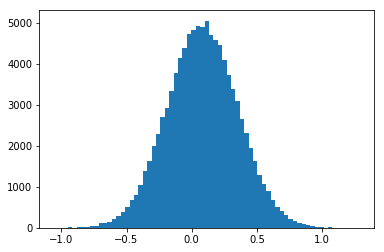

In [32]:
c = data['call']

c_mean = np.mean(c)
c_std = np.std(c)
c_normal = np.random.normal(c_mean, c_std, 100000)
num_bins = int(np.sqrt(len(c)))

plt.hist(c_normal, bins = num_bins)
plt.show()

<div class="span5 alert alert-success">
<p>1. What test is appropriate for this problem? Does CLT apply?</p>
   
   <p>The most appropriate test for this problem is a hypothesis testing using permutations. There are two datasets we are comparing with race and callbacks. CLT does apply to this distribution for callbacks. The histogram above resembles a normal distribution. In addition, the sample size is greater than 30. </p>
   
   <p>2. What are the null and alternate hypotheses?</p>
   
   <p>Null hypothesis: There is no difference in callback rates of black sounding names and white sounding names. 
   Alternate hypothesis: There is a difference in callback rates of black sounding names and white sounding names. 
   </p>
</div>

In [33]:
w = data[data.race=='w']
b = data[data.race=='b']

In [36]:
w_c = w['call']
w_c.describe()

count    2435.000000
mean        0.096509
std         0.295346
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

In [37]:
b_c = b['call']
b_c.describe()

count    2435.000000
mean        0.064476
std         0.245649
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: call, dtype: float64

##### Permutation Method: 

In [38]:
#Generate a permutation sample, then concatenate it. Finally splot the array into two.
def permutation_sample(data1, data2):
    
    data = np.concatenate((data1, data2))
    
    permuted_data = np.random.permutation(data)
    
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
    
    return perm_sample_1, perm_sample_2



In [39]:
#Drawing replicates of the permutation
def draw_perm_reps(data_1, data_2, func, size=1):
    
    perm_replicates = np.empty(size)
    
    for i in range(size):
        
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
        
        return perm_replicates

In [51]:
#Difference of means in two arrays
def diff_of_means(data_1, data_2):
     
    diff = np.mean(data_1) - np.mean(data_2)
    
    return diff

empirical_diff_means = diff_of_means(w_c, b_c)

perm_replicates = draw_perm_reps(w_c, b_c, diff_of_means, size = 100000)

p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value is',+p)

p-value is 0.0


##### Using, the permutation method, the p-value is 0.0, which rejects the null hypothesis. Therefore, there is a difference in receving callbacks for black sounding names and white sounding. 

In [73]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return print('Confidence interval is:',+ m-h, m+h)

mean_confidence_interval(data.call)


Confidence interval is: 0.07284931634376868 0.08813631738711969


The confidence interval suggests that 95% of the callbacks are between 0.073 and 0.088. 

##### Calculating z-score, p-value, margin of error and confidence interval: 

Two-sample z-test to evaluate the difference between two groups:
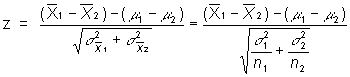 or 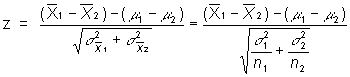


In [69]:
#mean of white and black callbacks
w_c_mean = np.mean(w_c)
b_c_mean = np.mean(b_c)

#standard deviation of white and black callbacks
w_c_std = np.std(w_c)
b_c_std = np.std(b_c)

#Standard error for the sum of white and black callbacks
w_c_SEsum = np.sqrt(len(w_c))*w_c_std
b_c_SEsum = np.sqrt(len(b_c))*b_c_std

#standard error of average of white and black callbacks
w_c_SEavg = w_c_SEsum/len(w_c)
b_c_SEavg = b_c_SEsum/len(b_c)

#standard error of difference
SE_diff = np.sqrt((w_c_SEavg)**2 + (b_c_SEavg)**2)

#observed difference
obs_diff = w_c_mean - b_c_mean

#z_score
#expected difference is 0 because the null hypothesis states there is no difference between black and white callbacks
z_score = (obs_diff - 0)/SE_diff

#p-value
p_value = stats.norm.sf(abs(z_score))*2

print('standard error of difference:',+SE_diff)
print('z-score:',+z_score)
print('p-value:',+p_value)

standard error of difference: 0.007783308359923415
z-score: 4.115583422082968
p-value: 3.862012801972172e-05


##### Once again, the p-value is below 0.05 resulting in data that is statistically signficant. Therefore, the null hypothesis is rejected in favor of the alternate hypothesis, stating there is a difference in callback rates between white sounding names versus black sounding names. 

In [70]:
#Calculate the z-critical value with a confidence interval of 95%
z_critical = stats.norm.ppf(q = 0.975) 

#Calculate the margin of error
margin_of_error = z_critical * SE_diff 
print('margin of error is',+margin_of_error)

#Confidence interval from the margin of error: (mean - margin of error, mean + margin of error)
confidence_interval = (obs_diff - margin_of_error,
                       obs_diff + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

margin of error is 0.01525500406601941
Confidence interval:
(0.01677785078904117, 0.047287858921079985)


### Conclusion: 

<div class="span5 alert alert-success">
<p> The data analysis in this assignment suggests that racial discrimination does, in fact, continues to be pervasive using the dataset given. Having a black sounding name resulted in statistcally sigficant fewer callbacks versus white sounding names. </p>
<p>The null hypothesis chosen in this case suggests there is no discrimination (difference) between black sounding and white sounding names. I used a permutation method to obtain a p-value by concatenating the black and white callbacks, then randomly splitting the data into two. This created a non-bias replicated datasets to compare to the actual datasets. The p-value resulted in rejected the null hypothesis suggesting there is discrimination between white and black sounding names. I also calculated a two sample z-score, and got a p-value that supported the permutation method. </p>
<p>One cannot state that race/name is the most important factor. In this problem, I only analyzed callback rates in comparison to black and white sounding names with matching resumes. What does "matching" mean? Experience, age, gender? Does the location of the job or the religion of the person factor into the decision making. One can say certain names sound Muslim or Hindu or Jewish. They can also be factors. 
</p>
</div>